In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report

## Simple Example

In [3]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [4]:
df

,yesterday,temp,today
0,no rain,80,rain
1,no rain,80,rain
2,no rain,80,no rain
3,rain,81,rain
4,rain,81,rain
5,rain,83,rain
6,rain,86,no rain
7,no rain,89,rain
8,rain,89,rain
9,no rain,89,no rain


In [5]:
# make sure I have a separate X and y:
X, y = df[['temp']], df['today']

### SKLEARN MODEL CREATION STEPS:
1. Make the thing
2. Fit the thing
3. Use the thing

In [6]:
# make the thing:
clf = DecisionTreeClassifier()

In [7]:
clf

DecisionTreeClassifier()

In [8]:
# fit the thing:
clf.fit(X,y)

DecisionTreeClassifier()

In [9]:
# clf has been altered (its fit)!
# use it!
clf.score(X, y)

0.8

In [10]:
# baseline: 7/10 days it rains, 70% accuracy on baseline assumption.  This model beats baseline by some degree

## Titanic Example

In [11]:
import acquire
import prepare
# if your prepare does not split your data already, prepare the data, then split the data here:
train, validate, test = prepare.prep_titanic(
acquire.get_titanic_data())

In [12]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,1,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,0,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,1,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,0,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,0,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [13]:
# X is going to be our entire domain, that is to say a set of features that represents everything in our feature space
# y is going to be our target variable, the dependent thing that we are using X to predict

In [14]:
# a single linear relationtionship:
# y = mx + b
# y remains one thing in our case, where the collection of X is going to be any number of features going in as independent
# features toward predicting our dependent variable y

In [15]:
# X: two brackets, feeding in a list of features
# y: a single Series, a single target.

In [16]:
# at this point, I will have presumed I have done proper exploration and determined that class, alone status,
# and departing town are the most valuable features

In [17]:
X_cols = ['pclass', 'alone', 'Q', 'S']
y_col = 'survived'

In [18]:
X_train, y_train = train[X_cols], train[y_col]

In [19]:
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [20]:
X_train.head()

,pclass,alone,Q,S
583,1,1,0,0
337,1,1,0,0
50,3,0,0,1
218,1,1,0,0
31,1,0,0,0


In [21]:
y_train.head()

583    0
337    1
50     0
218    1
31     1
Name: survived, dtype: int64

In [22]:
# make the thing
model1 = DecisionTreeClassifier()
# fit the thing
model1.fit(X_train, y_train)
# use the thing
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 71.43%
validate score: 71.03%


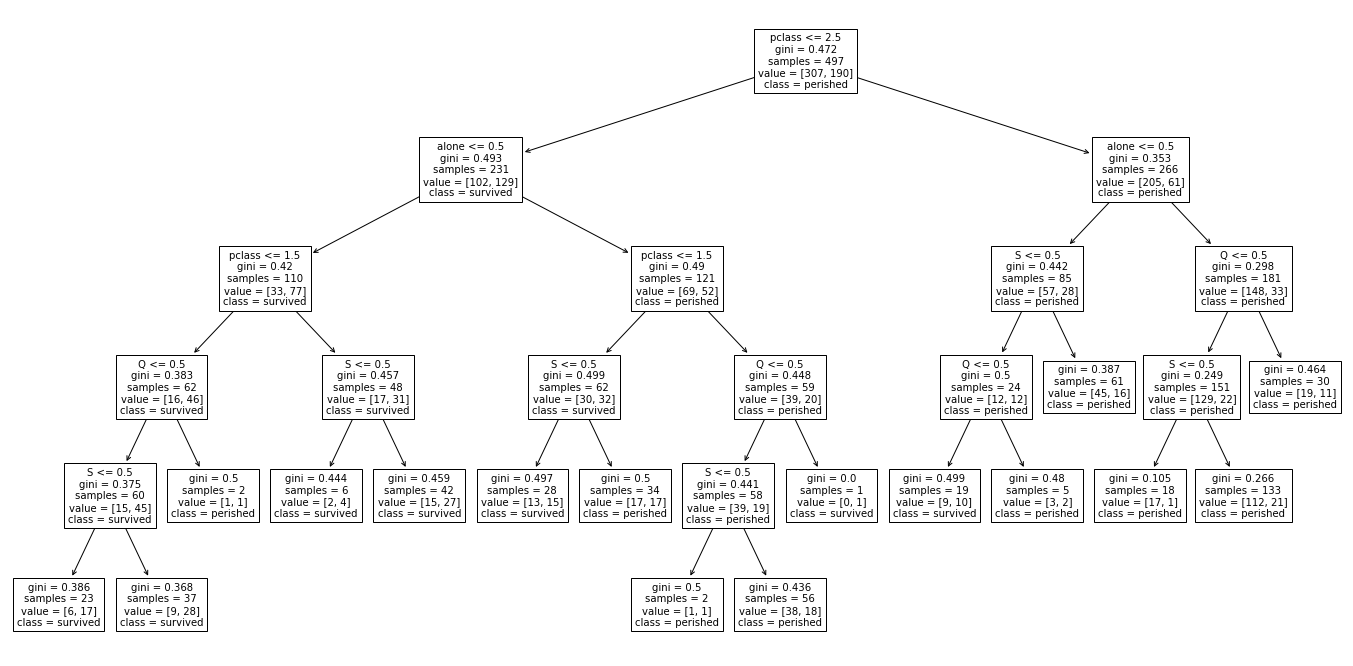

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [24]:
print(export_text(model1, feature_names=X_train.columns.to_list(), show_weights=True))

|--- pclass <= 2.50
|   |--- alone <= 0.50
|   |   |--- pclass <= 1.50
|   |   |   |--- Q <= 0.50
|   |   |   |   |--- S <= 0.50
|   |   |   |   |   |--- weights: [6.00, 17.00] class: 1
|   |   |   |   |--- S >  0.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |--- Q >  0.50
|   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- S <= 0.50
|   |   |   |   |--- weights: [2.00, 4.00] class: 1
|   |   |   |--- S >  0.50
|   |   |   |   |--- weights: [15.00, 27.00] class: 1
|   |--- alone >  0.50
|   |   |--- pclass <= 1.50
|   |   |   |--- S <= 0.50
|   |   |   |   |--- weights: [13.00, 15.00] class: 1
|   |   |   |--- S >  0.50
|   |   |   |   |--- weights: [17.00, 17.00] class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- Q <= 0.50
|   |   |   |   |--- S <= 0.50
|   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |--- S >  0.50
|   |   |   |   |   |--- weights: [38.00, 18.00] class: 0
|   |   |   |--

In [25]:
# TODO: create additional models
# change hyperparameters
# change feature sets
# compare model performance on validate
# make a new thing:
model2 = DecisionTreeClassifier(max_depth=2)
# fit a new thing:
model2.fit(X_train, y_train)
# use a new thing:
model2.score(X_train, y_train)

0.7062374245472837

In [26]:
# I will compare the scores of these models on the validation sets.

# NOTE:
# I AM NOT RE-FITTING THE MODEL ON VALIDATE.  MERELY USING THE PRE-TRAINED MODEL TO EXAMINE 
# PERFORMANCE ON 'UNSEEN' DATA

In [27]:
# accuracy performance on model1 to model2 (on train)
model1.score(X_train, y_train), model2.score(X_train, y_train)

(0.7142857142857143, 0.7062374245472837)

In [28]:
# accuracy performance on model2 to model2 (on validate)
model1.score(X_validate, y_validate), model2.score(X_validate, y_validate)

(0.7102803738317757, 0.6915887850467289)

In [29]:
# We will not use test quite yet, as test will only be utilized when we select our *best* model.  
# The number of models we use to compare is in our hands, but we must always follow the correct procedure:
# Fit *only on train*
# assess performance on train and validate (DO NOT RE-FIT ON VALIDATE)
# select best performing model
# use best model on test

In [30]:
# here, we can see a slightly cleaner plot_tree call (with color!)

In [31]:
model3 = DecisionTreeClassifier(max_leaf_nodes=7)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7)

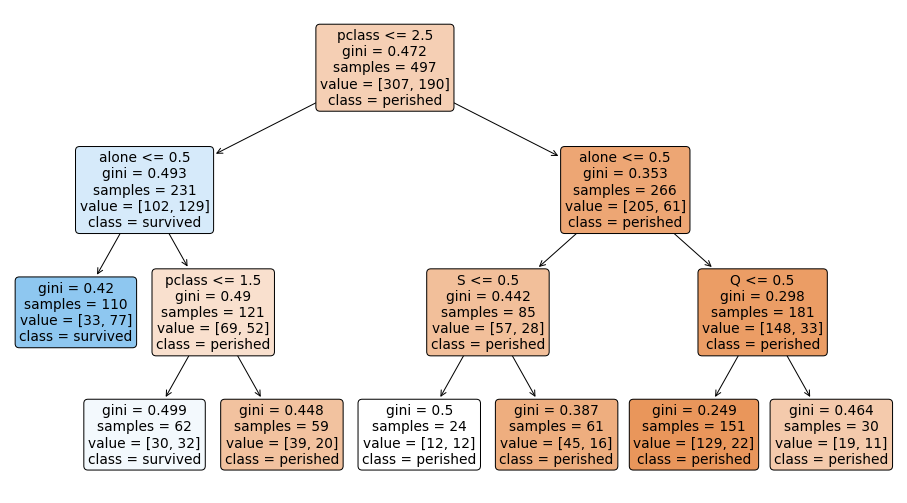

In [32]:
plt.figure(figsize=(16, 9))
plot_tree(
    # what thing:
          model3, 
    # what are the features called for the sake of the diagram?
          feature_names=X_train.columns.tolist(), 
    # what are the classes called for the sake of the diagram?
          class_names=['perished', 'survived'], 
    # fill the nodes with color!
          filled=True, 
    # round the corners
          rounded=True);
# note the opacity associates with the gini impurity!

In [33]:
# we can examine the assessed feature importances in our fit model(s):
model3.feature_importances_

array([0.65198167, 0.2482131 , 0.05555983, 0.04424539])

In [34]:
# These correspond with the indeces of our columns
X_train.columns

Index(['pclass', 'alone', 'Q', 'S'], dtype='object')

In [35]:
# let's zip those together into a dictionary, then turn that dictionary into a series.

In [36]:
pd.Series(dict(zip(X_train.columns, model3.feature_importances_)))

pclass    0.651982
alone     0.248213
Q         0.055560
S         0.044245
dtype: float64

With the output from the cell above, the index is the feature name, and the values are the importances of each feature, according to our decision tree model.

<AxesSubplot:ylabel='Feature Importance'>

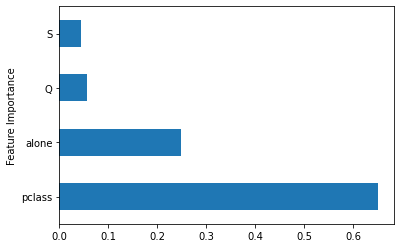

In [37]:
# why a series? because we can plot that with a horizontal bar chart rather easily!
pd.Series(dict(zip(X_train.columns, model3.feature_importances_))).plot.barh(xlabel='Feature Importance')

Examining a classification report on a model output:

In [38]:
# which class is the default for a baseline?
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [39]:
# 0 for death is our default assumption here.

In [40]:
# DecisionTreeClassifier().predict will output the class predictions of the fit model:
# it must be fed the independent variables that match what it was trained on:
# for example, if it was trained on ['class'], feeding the predict(X_train[['class', 'Q']]) would break,
# which is why we save a variable of a feature list like X_cols for ease of notation.
model1.predict(X_train[X_cols])

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [41]:
# first, let's create a dataframe for our y predictions and baseline.
y_preds = pd.DataFrame(
{
    'y_actual': y_validate.values,
    'baseline': 0,
    'model_1': model1.predict(X_validate[X_cols]),
    'model_2': model2.predict(X_validate[X_cols]),
    'model_3': model3.predict(X_validate[X_cols])
})

In [42]:
y_preds.head()

,y_actual,baseline,model_1,model_2,model_3
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,1
4,0,0,0,0,0


In [43]:
# we can use this dataframe to compare our actual y validate values against our baseline and models now!

In [44]:
# baseline validation accuracy:
(y_preds.y_actual == y_preds.baseline).mean()

0.616822429906542

In [45]:
# classification report on model 1 using y_preds dataframe:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.713415,0.700000,0.71028,0.706707,0.708274
recall,0.886364,0.426829,0.71028,0.656596,0.710280
f1-score,0.790541,0.530303,0.71028,0.660422,0.690823
support,132.000000,82.000000,0.71028,214.000000,214.000000


## Recap

Decision Trees in the modeling loop

1. Create the model (setting hyperparams)
2. Fit the object on training data (sklearn does math)
3. Interpret / use the model (evaluate it's performance and see how it works)